# Madrid Housing Market Analysis and Price Prediction

Analyze the Madrid housing market and predict prices based on key features such as district name, room and bathroom counts, area, and parking availability.

### Import libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

### Read Data

In [5]:
df = pd.read_csv(r'C:\Users\Azhaa\Downloads\houses_Madrid.csv')

### 📊 Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [7]:
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.00,60.00,2,1.00,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.00,NaN,3,1.00,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.00,54.00,2,2.00,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.00,NaN,2,1.00,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.00,90.00,2,2.00,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.00,True,True,True,True


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

In [9]:
df = df[['id' ,'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 
         'buy_price', 'buy_price_by_area', 'has_parking']]


In [10]:
df.shape

(21742, 8)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                     0
subtitle               0
sq_mt_built          126
n_rooms                0
n_bathrooms           16
buy_price              0
buy_price_by_area      0
has_parking            0
dtype: int64

In [13]:
df= df.dropna(subset= ['sq_mt_built'])

In [14]:
df['n_bathrooms'].mode()

0   1.00
Name: n_bathrooms, dtype: float64

In [15]:
df['n_bathrooms'] = df['n_bathrooms'].fillna(1)

In [16]:
df.isnull().sum()

id                   0
subtitle             0
sq_mt_built          0
n_rooms              0
n_bathrooms          0
buy_price            0
buy_price_by_area    0
has_parking          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21616 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21616 non-null  int64  
 1   subtitle           21616 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21616 non-null  int64  
 4   n_bathrooms        21616 non-null  float64
 5   buy_price          21616 non-null  int64  
 6   buy_price_by_area  21616 non-null  int64  
 7   has_parking        21616 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 1.3+ MB


In [18]:
df.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
count,21616.00,21616.00,21616.00,21616.00,21616.00,21616.00
mean,10857.70,146.92,2.98,2.06,636284.02,4027.13
std,6289.24,134.18,1.47,1.33,743318.84,1910.07
min,1.00,13.00,0.00,1.00,36000.00,447.00
25%,5407.75,70.00,2.00,1.00,198000.00,2555.50
50%,10814.50,100.00,3.00,2.00,370000.00,3732.50
75%,16338.25,162.00,4.00,2.00,750000.00,5000.00
max,21742.00,999.00,24.00,14.00,8800000.00,18889.00


In [19]:
df.drop(df.index[df.n_rooms == 0], axis= 0, inplace= True)

In [20]:
df.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
count,21177.00,21177.00,21177.00,21177.00,21177.00,21177.00
mean,10856.58,148.65,3.04,2.08,644503.66,4022.38
std,6292.32,134.65,1.42,1.34,747510.50,1910.83
min,1.00,16.00,1.00,1.00,36000.00,536.00
25%,5413.00,71.00,2.00,1.00,199000.00,2550.00
50%,10823.00,101.00,3.00,2.00,379000.00,3723.00
75%,16323.00,165.00,4.00,2.00,765000.00,5000.00
max,21742.00,999.00,24.00,14.00,8800000.00,18889.00


In [21]:
df['n_bathrooms'] = df['n_bathrooms'].astype(int)

In [22]:
df['id'] = df.index
df.drop(columns= 'id', axis=1, inplace=True)

In [23]:
df.sample(10)

,subtitle,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,has_parking
13694,"Ventas, Madrid",69.00,3,1,159000,2304,False
446,"Los Ángeles, Madrid",54.00,2,1,148000,2741,False
6735,"Moncloa, Madrid",720.00,8,7,2250000,3125,True
18256,"Centro, Madrid",79.00,1,1,425000,5380,False
6626,"Puerta del Ángel, Madrid",70.00,2,2,165000,2357,False
11167,"Chamberí, Madrid",230.00,1,2,1475000,6413,False
19411,"Goya, Madrid",43.00,2,2,325000,7558,False
3933,"Retiro, Madrid",152.00,3,2,555000,3651,True
1597,"Casco Histórico de Vallecas, Madrid",70.00,3,1,135000,1929,False
3183,"Tetuán, Madrid",79.00,2,1,240000,3038,True


In [24]:
df['subtitle'] = df['subtitle'].str.split(',', expand= True)[0]

In [25]:
df = df.rename(columns= {'subtitle' : 'District'})

In [26]:
df.head()

,District,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,has_parking
0,San Cristóbal,64.00,2,1,85000,1328,False
1,Los Ángeles,70.00,3,1,129900,1856,False
2,San Andrés,94.00,2,2,144247,1535,False
3,San Andrés,64.00,2,1,109900,1717,False
4,Los Rosales,108.00,2,2,260000,2407,True


### Univariate Analysis

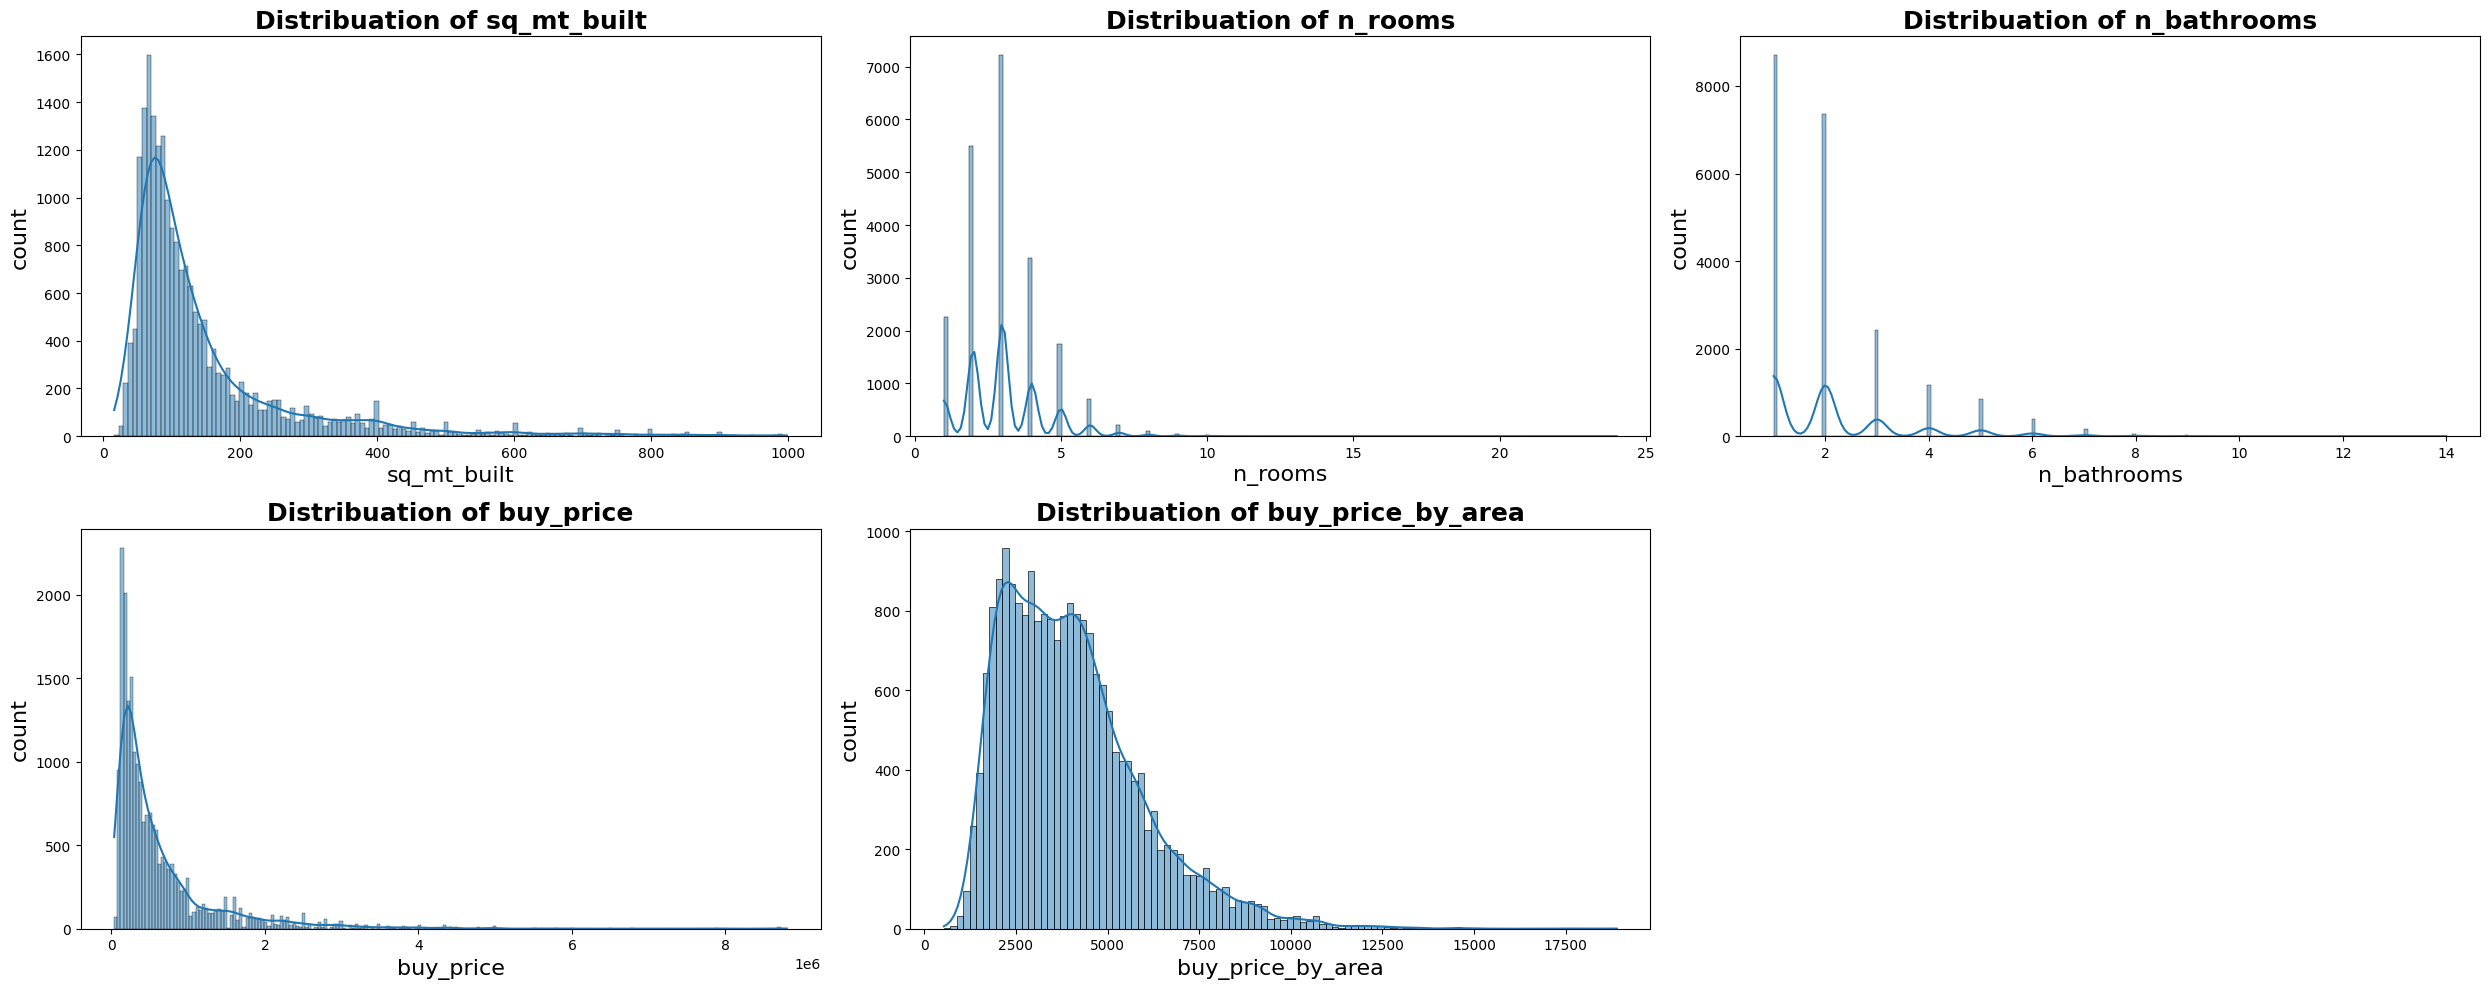

In [27]:
data = df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price', 'buy_price_by_area']]
plt.figure(figsize=(25,10))
for index, columnname in enumerate(data):
    plt.subplot(2, 3, index+1)
    sns.histplot(data[columnname], kde= True)
    plt.xlabel(columnname, fontsize= 16)
    plt.ylabel('count',fontsize= 16) 
    plt.title(f'Distribuation of {columnname}', fontsize= 18, fontweight='bold')
    plt.tight_layout()

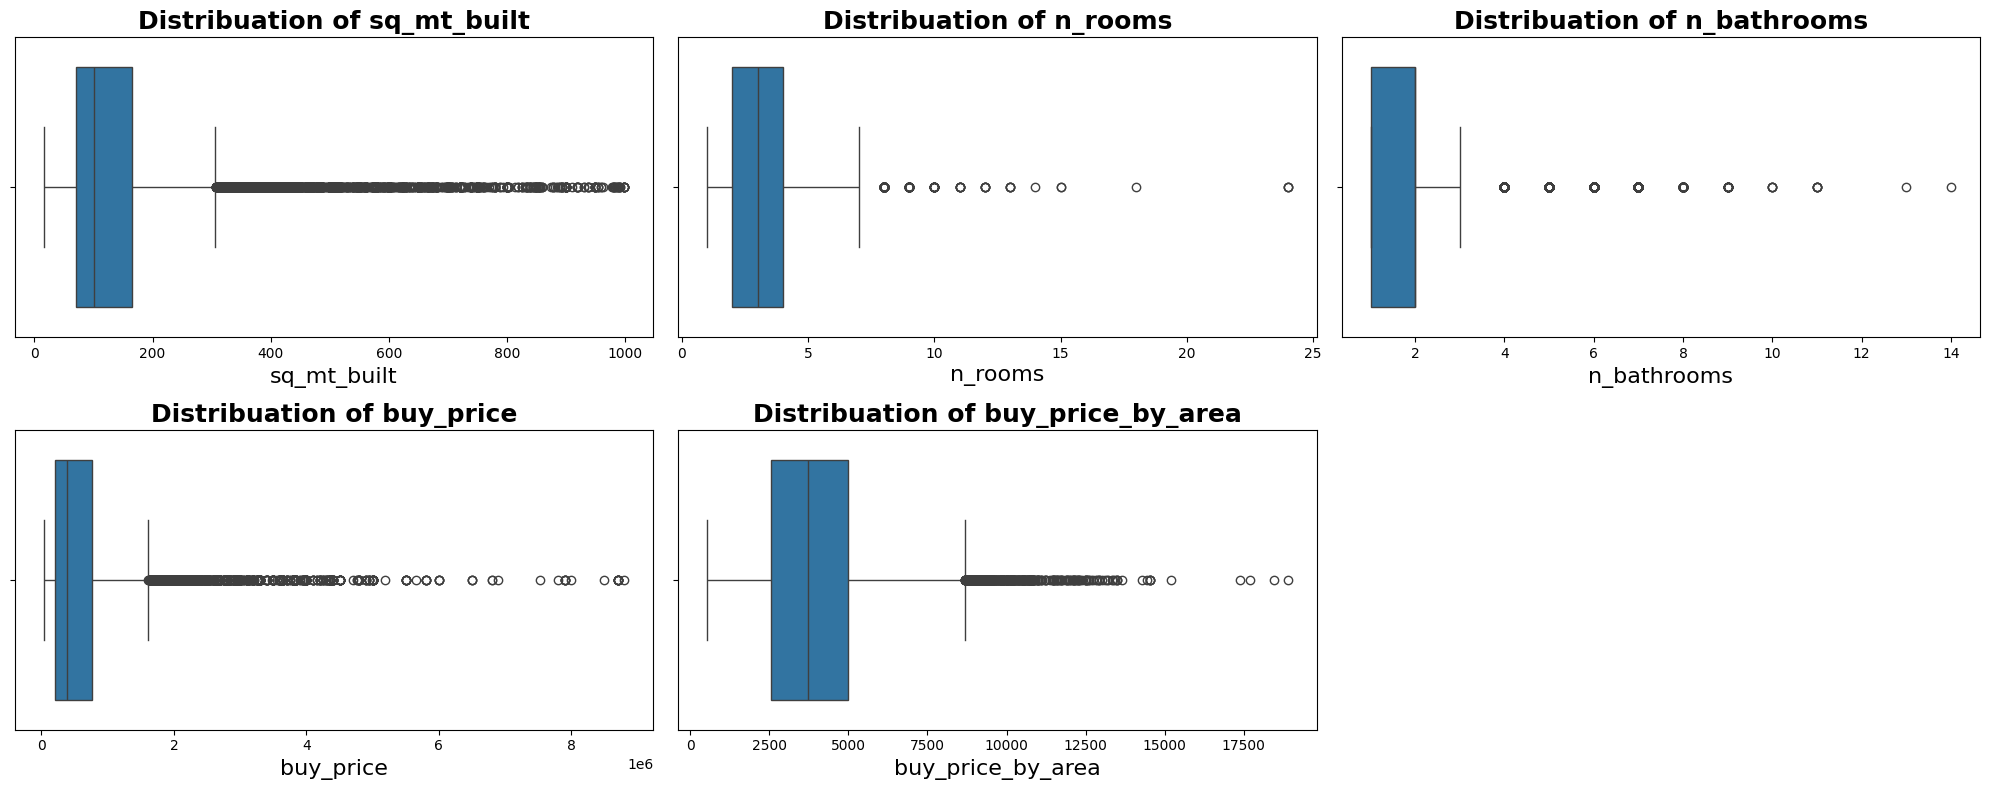

In [28]:
plt.figure(figsize=(20,8))
for index, columnname in enumerate(data):
    plt.subplot(2,3, index + 1)
    sns.boxplot(x= data[columnname])
    plt.title(f'Distribuation of {columnname}', fontsize= 18, fontweight= 'bold')
    plt.xlabel(columnname, fontsize= 16)
    plt.tight_layout()

In [ ]:
park = df['has_parking']
px.pie(names= park, title= 'Distribuation has_parking')

In [30]:
px.bar(df['District'].value_counts(), title= 'Distribuation of District in Madrid')

In [31]:
most_expensive_districts = df.groupby('District')['buy_price'].mean().nlargest(10)
px.bar(most_expensive_districts, title= 'Top 10 Most Expensive Districts')

In [55]:
park_avg = df.groupby('has_parking')['buy_price'].mean().reset_index()
park_avg['has_parking'] = park_avg['has_parking'].map({0: 'No', 1: 'Yes'})

fig = px.bar(
        park_avg,
        x='has_parking',
        y='buy_price',
        title='Average Buy Price by Parking Availability',
        labels={'has_parking': 'Has Parking', 'buy_price': 'Average Buy Price (€)'},
        color='has_parking',
        color_discrete_map={'Yes': 'green', 'No': 'red'}
    )
fig

### Bivariate Analysis

correlation coefficent

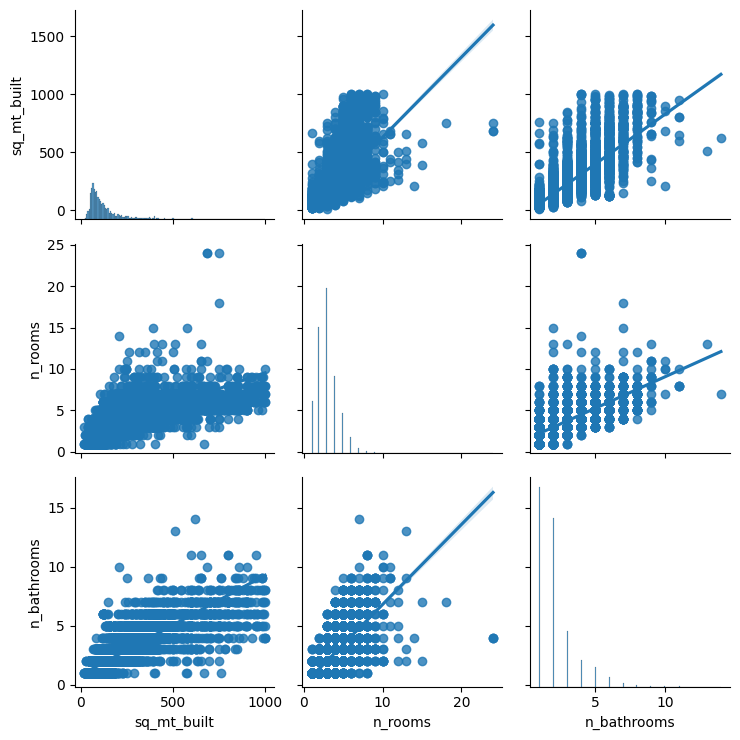

In [34]:
# between features
sns.pairplot(data[['sq_mt_built','n_rooms','n_bathrooms']], kind='reg')
plt.tight_layout()

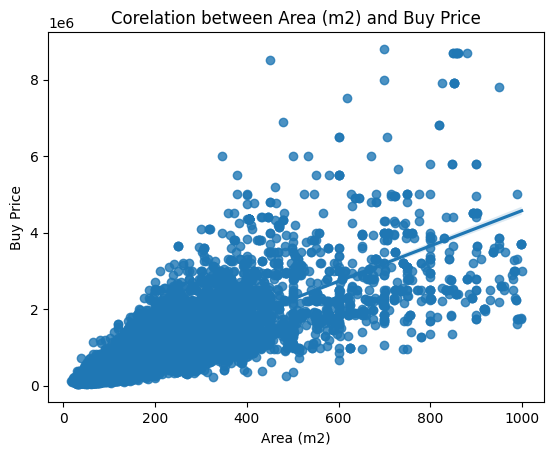

In [35]:
# Create a regression plot to visualize the correlation between 'sq_mt_built' (area in m²) and 'buy_price'
sns.regplot(data=df, x= 'sq_mt_built', y= 'buy_price')
plt.title('Corelation between Area (m2) and Buy Price')
plt.xlabel('Area (m2)')
plt.ylabel('Buy Price')
plt.show()

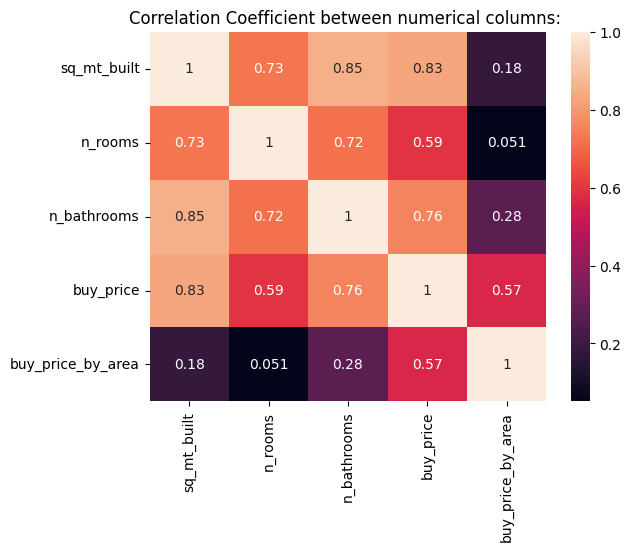

In [36]:
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation Coefficient between numerical columns: ')
plt.show()

In [37]:
df['has_parking'] = df['has_parking'].astype(int)

In [38]:
df = pd.get_dummies(df, columns=['District'], drop_first=True)

In [39]:
district_columns = [col for col in df.columns if col.startswith('District_')]
print(district_columns)

['District_Abrantes', 'District_Acacias', 'District_Adelfas', 'District_Alameda de Osuna', 'District_Almagro', 'District_Almendrales', 'District_Aluche', 'District_Ambroz', 'District_Apóstol Santiago', 'District_Arapiles', 'District_Aravaca', 'District_Arganzuela', 'District_Argüelles', 'District_Arroyo del Fresno', 'District_Atalaya', 'District_Barajas', 'District_Barrio de Salamanca', 'District_Bellas Vistas', 'District_Bernabéu-Hispanoamérica', 'District_Berruguete', 'District_Buena Vista', 'District_Butarque', 'District_Campamento', 'District_Campo de las Naciones-Corralejos', 'District_Canillas', 'District_Carabanchel', 'District_Casa de Campo', 'District_Casco Histórico de Barajas', 'District_Casco Histórico de Vallecas', 'District_Casco Histórico de Vicálvaro', 'District_Castellana', 'District_Castilla', 'District_Centro', 'District_Chamartín', 'District_Chamberí', 'District_Chopera', 'District_Chueca-Justicia', 'District_Ciudad Jardín', 'District_Ciudad Lineal', 'District_Ciuda

### 🤖 Prediction & Modeling

### 📈 Model Evaluation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

x = df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'has_parking', 'District_Abrantes', 'District_Acacias', 'District_Adelfas', 'District_Alameda de Osuna', 'District_Almagro', 'District_Almendrales', 'District_Aluche', 'District_Ambroz', 'District_Apóstol Santiago', 'District_Arapiles', 'District_Aravaca', 'District_Arganzuela', 'District_Argüelles', 'District_Arroyo del Fresno', 'District_Atalaya', 'District_Barajas', 'District_Barrio de Salamanca', 'District_Bellas Vistas', 'District_Bernabéu-Hispanoamérica', 'District_Berruguete', 'District_Buena Vista', 'District_Butarque', 'District_Campamento', 'District_Campo de las Naciones-Corralejos', 'District_Canillas', 'District_Carabanchel', 'District_Casa de Campo', 'District_Casco Histórico de Barajas', 'District_Casco Histórico de Vallecas', 'District_Casco Histórico de Vicálvaro', 'District_Castellana', 'District_Castilla', 'District_Centro', 'District_Chamartín', 'District_Chamberí', 'District_Chopera', 'District_Chueca-Justicia', 'District_Ciudad Jardín', 'District_Ciudad Lineal', 'District_Ciudad Universitaria', 'District_Colina', 'District_Comillas', 'District_Concepción', 'District_Conde Orgaz-Piovera', 'District_Costillares', 'District_Cuatro Caminos', 'District_Cuatro Vientos', 'District_Cuzco-Castillejos', 'District_Delicias', 'District_El Cañaveral - Los Berrocales', 'District_El Pardo', 'District_El Plantío', 'District_El Viso', 'District_Ensanche de Vallecas - La Gavia', 'District_Entrevías', 'District_Estrella', 'District_Fontarrón', 'District_Fuencarral', 'District_Fuente del Berro', 'District_Fuentelarreina', 'District_Gaztambide', 'District_Goya', 'District_Guindalera', 'District_Horcajo', 'District_Hortaleza', 'District_Huertas-Cortes', 'District_Ibiza', 'District_Imperial', 'District_Jerónimos', 'District_La Paz', 'District_Las Tablas', 'District_Latina', 'District_Lavapiés-Embajadores', 'District_Legazpi', 'District_Lista', 'District_Los Cármenes', 'District_Los Rosales', 'District_Los Ángeles', 'District_Lucero', 'District_Malasaña-Universidad', 'District_Marroquina', 'District_Media Legua', 'District_Mirasierra', 'District_Moncloa', 'District_Montecarmelo', 'District_Moratalaz', 'District_Moscardó', 'District_Niño Jesús', 'District_Nueva España', 'District_Nuevos Ministerios-Ríos Rosas', 'District_Numancia', 'District_Opañel', 'District_Orcasitas', 'District_Pacífico', 'District_Palacio', 'District_Palomas', 'District_Palomeras Bajas', 'District_Palomeras sureste', 'District_Palos de Moguer', 'District_Pau de Carabanchel', 'District_Pavones', 'District_Peñagrande', 'District_Pilar', 'District_Pinar del Rey', 'District_Portazgo', 'District_Pradolongo', 'District_Prosperidad', 'District_Pueblo Nuevo', 'District_Puente de Vallecas', 'District_Puerta Bonita', 'District_Puerta del Ángel', 'District_Quintana', 'District_Recoletos', 'District_Retiro', 'District_San Andrés', 'District_San Cristóbal', 'District_San Diego', 'District_San Fermín', 'District_San Isidro', 'District_San Juan Bautista', 'District_San Pascual', 'District_Sanchinarro', 'District_Santa Eugenia', 'District_Sol', 'District_Tetuán', 'District_Timón', 'District_Trafalgar', 'District_Tres Olivos - Valverde', 'District_Usera', 'District_Valdeacederas', 'District_Valdebebas - Valdefuentes', 'District_Valdebernardo - Valderribas', 'District_Valdemarín', 'District_Valdezarza', 'District_Vallehermoso', 'District_Ventas', 'District_Ventilla-Almenara', 'District_Vicálvaro', 'District_Villa de Vallecas', 'District_Villaverde', 'District_Vinateros', 'District_Virgen del Cortijo - Manoteras', 'District_Vista Alegre', 'District_Zofío', 'District_Águilas']]
y = df['buy_price']
y = np.array(y)

### Linear Regression

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression() #modeling

model.fit(x_train, y_train) # training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred = model.predict(x_test) #testing
y_pred

array([2049892.16221191,  939340.32044917,  450007.51841578, ...,
        591574.9580688 ,  766693.50614617,  209923.0533199 ])

In [43]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))
print('R2 Score:', r2_score(y_test,y_pred))


MAE: 177751.96229251733
MSE: 113742574208.96518
RMSE: 337257.4301760677
R2 Score: 0.7963278844303437


### Random Forest Regressor

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

RFC = RandomForestRegressor() #modeling

RFC.fit(x_train, y_train) # training
y_pred = RFC.predict(x_test) #testing
y_pred.round(2)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))
print('R2 Score:', r2_score(y_test,y_pred))

MAE: 124914.8050891809
MSE: 74121500436.68419
RMSE: 272252.6408259141
R2 Score: 0.8672750031540366


### XGboost

In [45]:
import xgboost

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XGR = xgboost.XGBRegressor() #modeling

XGR.fit(x_train, y_train) # training

y_pred = XGR.predict(x_test) #testing
y_pred.round(2)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))
print('R2 Score:', r2_score(y_test,y_pred))

MAE: 130597.3515625
MSE: 67677151232.0
RMSE: 260148.32544531208
R2 Score: 0.8788145184516907


I chose XGBoost Regressor as the final model because it achieved the highest R² score (0.878) among all tested models.

In [54]:
model_features = x.columns

def predict_price(area, rooms, bathrooms, parking, district):
    new_data = np.zeros(len(model_features))

    new_data[model_features.get_loc('sq_mt_built')] = area
    assert new_data[model_features.get_loc('sq_mt_built')] > 0 , "area must be grater than 0"

    new_data[model_features.get_loc('n_rooms')] = rooms
    assert new_data[model_features.get_loc('n_rooms')] > 0 , "number of rooms must be grater than 0"

    new_data[model_features.get_loc('n_bathrooms')] = bathrooms
    assert new_data[model_features.get_loc('n_bathrooms')] > 0 , "number of bathrooms must be grater than 0"

    new_data[model_features.get_loc('has_parking')] = parking
    assert new_data[model_features.get_loc('has_parking')] in [0, 1], "has_parking must be 0 or 1"

    district_col = district
    if district_col in model_features:
        new_data[model_features.get_loc(district_col)] = 1

    new_house_df = pd.DataFrame([new_data], columns= model_features)

    predicted_price = XGR.predict(new_house_df)

    return f'pridected price of flat in {district_col} with area of {area} m2,\n{rooms} rooms and {bathrooms} bathrooms = {predicted_price[0]:,.2f} Euro'

print(predict_price(500, 6, 2, 1, 'District_Centro'))

pridected price of flat in District_Centro with area of 500 m2,
6 rooms and 2 bathrooms = 2,747,548.75 Euro


### 📌 Conclusion

- We analyzed housing prices in Madrid using key features like area, rooms, bathrooms, and district.
- After comparing several models, **XGBoost Regressor** gave the best performance with R² = 0.878.
- The model was used to predict prices with good accuracy and is ready for deployment.